# 1 Theory

### 1

# 2 Logistic Regression

In [430]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb # I'm not using this for the assignment, this is just to get a feel for the data
import pandas as pd
import math
from math import exp

In [431]:
#1
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df = iris_df[['sepal length (cm)', 'sepal width (cm)', 'target']]

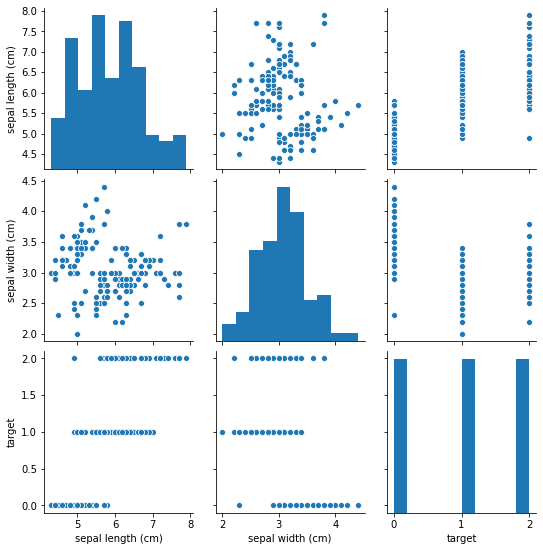

In [432]:
sb.pairplot(iris_df)

In [433]:
X = np.array(X)
y_o = np.array(y)
y = np.array(y)
y = y.reshape((X.shape[0], 1))
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [434]:
#2
X_std = preprocessing.scale(X)

In [435]:
fixed_theta = []
for i in range(3):
    fixed_theta.append(random.uniform(-1,1))
fixed_theta = np.array(fixed_theta).reshape(3,1)
fixed_theta

array([[-0.75746023],
       [ 0.390267  ],
       [-0.0413842 ]])

In [436]:
# X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.33, random_state=42)

# X_tr = np.c_[np.ones(len(X_train)),X_train]
# X_tr = np.array(X_tr)
# X_ts = np.c_[np.ones(len(X_test)),X_test]
# X_ts = np.array(X_ts)
# y_tr = np.array(y_train)
# y_ts = np.array(y_test)

X = np.c_[np.ones(len(X)),X_std]
X = np.array(X)
y = np.array(y)
print(X)
print(y)

[[ 1.         -0.90068117  1.01900435]
 [ 1.         -1.14301691 -0.13197948]
 [ 1.         -1.38535265  0.32841405]
 [ 1.         -1.50652052  0.09821729]
 [ 1.         -1.02184904  1.24920112]
 [ 1.         -0.53717756  1.93979142]
 [ 1.         -1.50652052  0.78880759]
 [ 1.         -1.02184904  0.78880759]
 [ 1.         -1.74885626 -0.36217625]
 [ 1.         -1.14301691  0.09821729]
 [ 1.         -0.53717756  1.47939788]
 [ 1.         -1.26418478  0.78880759]
 [ 1.         -1.26418478 -0.13197948]
 [ 1.         -1.87002413 -0.13197948]
 [ 1.         -0.05250608  2.16998818]
 [ 1.         -0.17367395  3.09077525]
 [ 1.         -0.53717756  1.93979142]
 [ 1.         -0.90068117  1.01900435]
 [ 1.         -0.17367395  1.70959465]
 [ 1.         -0.90068117  1.70959465]
 [ 1.         -0.53717756  0.78880759]
 [ 1.         -0.90068117  1.47939788]
 [ 1.         -1.50652052  1.24920112]
 [ 1.         -0.90068117  0.55861082]
 [ 1.         -1.26418478  0.78880759]
 [ 1.         -1.02184904

In [437]:
fixed_theta

array([[-0.75746023],
       [ 0.390267  ],
       [-0.0413842 ]])

In [438]:
m = -1 * (X @ fixed_theta)
print(m.shape)
zeroes = np.zeros(len(m))
e = zeroes + exp(1)
e = e.reshape((len(e),1))
# print(e)/
# print(e**np.ones(len(m)))
1/(1 + e**m)

(150, 1)


array([[0.24028146],
       [0.23181692],
       [0.21220104],
       [0.20595701],
       [0.23006373],
       [0.2597286 ],
       [0.20132242],
       [0.23345602],
       [0.19388007],
       [0.2301248 ],
       [0.26340865],
       [0.21695945],
       [0.22350299],
       [0.18515463],
       [0.29572169],
       [0.27825203],
       [0.2597286 ],
       [0.24028146],
       [0.28987532],
       [0.23510316],
       [0.26899115],
       [0.23682063],
       [0.19827628],
       [0.2437767 ],
       [0.21695945],
       [0.24034439],
       [0.23345602],
       [0.24901936],
       [0.25080516],
       [0.21220104],
       [0.22185403],
       [0.26899115],
       [0.23848412],
       [0.26334177],
       [0.2301248 ],
       [0.23688294],
       [0.27648079],
       [0.22179452],
       [0.19239551],
       [0.24202479],
       [0.23175554],
       [0.21072749],
       [0.1894524 ],
       [0.23175554],
       [0.23510316],
       [0.22350299],
       [0.23510316],
       [0.204

In [439]:
# print(X[:,[1]])
print(X.shape)
print('fixed theta', fixed_theta)
print(fixed_theta.shape)
a = (X @ fixed_theta)   # (150,)
print(a * a)
print(a @ a)

(150, 3)
fixed theta [[-0.75746023]
 [ 0.390267  ]
 [-0.0413842 ]]
(3, 1)
[[1.32511652e+00]
 [1.43539605e+00]
 [1.72058001e+00]
 [1.82106962e+00]
 [1.45914655e+00]
 [1.09700409e+00]
 [1.89902085e+00]
 [1.41347933e+00]
 [2.03060434e+00]
 [1.45831385e+00]
 [1.05745562e+00]
 [1.64730554e+00]
 [1.55094139e+00]
 [2.19575223e+00]
 [7.52998482e-01]
 [9.08492463e-01]
 [1.09700409e+00]
 [1.32511652e+00]
 [8.02797460e-01]
 [1.39173122e+00]
 [9.99494227e-01]
 [1.36934481e+00]
 [1.95189588e+00]
 [1.28161427e+00]
 [1.64730554e+00]
 [1.32432299e+00]
 [1.41347933e+00]
 [1.21848313e+00]
 [1.19754223e+00]
 [1.72058001e+00]
 [1.57476016e+00]
 [9.99494227e-01]
 [1.34794025e+00]
 [1.05816471e+00]
 [1.45831385e+00]
 [1.36853814e+00]
 [9.25416620e-01]
 [1.57562547e+00]
 [2.05784551e+00]
 [1.30327464e+00]
 [1.43622219e+00]
 [1.74384140e+00]
 [2.11287237e+00]
 [1.43622219e+00]
 [1.39173122e+00]
 [1.55094139e+00]
 [1.39173122e+00]
 [1.84687186e+00]
 [1.15694640e+00]
 [1.39091798e+00]
 [5.02158433e-02]
 [2.5787

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 150 is different from 1)

In [440]:
def g(X,theta): # returns (n,1)  # assuming X(n,3) and theta(3,1)
    m = -1 * (X @ theta)  # (150,1)
    e = np.zeros(len(m)) + exp(1)
    e = e.reshape(m.shape)
    em = e ** m
    ones1 = np.ones(len(m)).reshape(m.shape)
    ones2 = np.ones(len(m)).reshape(m.shape)
    return ones1/(ones2 + e**m)

In [441]:
# def y_compute(X, theta):
#     a = -1 * (X @ theta)  # returns (150,)
#     return (1/(1 + e**a))[0]

def likelihood(y,X,theta):
    gXt = g(X,theta)  # (n,1)
    o_gXt = (np.ones(len(gXt)).reshape(gXt.shape) - gXt)  # (n,1)
    o_y = (np.ones(len(y)).reshape(y.shape) - y)
    p = ((gXt**y) * (o_gXt**o_y))
#     return p
    return np.prod(p)

def log_likelihood(y,X,theta):
    gXt = g(X,theta)  # (n,1)
    o_gXt = (np.ones(len(gXt)).reshape(gXt.shape) - gXt)  # (n,1)
    o_y = (np.ones(len(y)).reshape(y.shape) - y)
    p = ((y * np.log(gXt)) + (o_y * np.log(o_gXt)))
#     return p
    return np.sum(p)

def loss(y,X,theta):
    return -1 * log_likelihood(y,X,theta)

def compute_new_theta(theta, eta, X, y):
    return theta + (eta * (X.T @ (y - g(X, theta))))

In [442]:
theta = np.array(fixed_theta.copy())
# gXt = g(X,theta)
# o_gXt = (np.ones(len(gXt)).reshape(gXt.shape) - gXt)
# o_y = (np.ones(len(y)).reshape(y.shape) - y)
# y
log_likelihood(y,X,theta)
# g(X,theta).shape
# loss(y,X,theta)
# likelihood(y,X,fixed_theta)
# log_likelihood(y,X,fixed_theta)
# g(X,fixed_theta).shape
# compute_new_theta(fixed_theta, 0.1, X,y)

-114.4316433845317

In [449]:
#3

theta = []
for i in range(3):
    theta.append(random.uniform(-1,1))
theta = np.array(theta).reshape(3,1)

# theta = fixed_theta.copy()
# theta = np.array(theta)
# theta = theta.reshape(1,3)

maxE = 2**(-23)
print('maxE',maxE)
# new_theta = theta.copy()
# theta = np.array(new_theta)
# thetas = []

# print(g(X_tr, theta))

print('Initial theta: ',theta)

iteration = 0
log_errors = []
previous_l = 1
np.seterr(divide = 'ignore') 

while True:
    new_theta = compute_new_theta(theta, 0.01, X, y)
#     print('new theta', new_theta)
#     print(new_theta.shape)
#     if abs(theta[0] - new_theta[0]) < maxE and abs(theta[1] - new_theta[1]) < maxE and abs(theta[2] - new_theta[2]) < maxE:
#         break
    if iteration == 10000:
        break
    
    likelihood_product = log_likelihood(y,X,new_theta)
    l = loss(y,X,new_theta)
#     print('likelihood_product',likelihood_product)
    if abs(previous_l - l) < maxE:
        print('loss', likelihood_product)
        break
    previous_l = l
    
#     for x,y in zip(X, yz):
# #         X1 = x[1]
# #         X2 = x[2]
#         y_a = y
#         y_p = y_compute(x, new_theta)
#         if y_p <= 0:
#             print(y_p)
#         try:
#             if y_p == 0 or 1 - y_p == 0:
#                 print(x,y_a, y_p ,theta)
#             error = (y_a * np.log(y_p)) + ((1-y_a) * np.log(1-y_p))
#             error_sum += error
#         except:
#             print('y_a',y_a)
#             print('y_p',y_p)
    
#     log_error = (-1) * error_sum / X_tr.shape[0]
#     if log_error - 0.00751309 < 0.00000001:
#         print('oye',new_theta)
#         print(log_error)
#     log_errors.append(log_error)
#     thetas.append(new_theta)
    
#     if abs(log_error) < maxE:
#         break
    
    
    theta = new_theta
    iteration = iteration + 1

print('new theta',new_theta)
# print('errors', log_errors)
# print(iteration)


# plt.axes(xlabel='iterations', ylabel='RMSEs for Test set')
# plt.plot(iterations, RMSEs_test)
# plt.show()

# plt.axes(xlabel='iterations', ylabel='RMSEs for Training set')
# plt.plot(iterations, RMSEs_train)
# plt.show()

maxE 1.1920928955078125e-07
Initial theta:  [[ 0.1191605 ]
 [-0.06162097]
 [-0.23796104]]


s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply


new theta [[10.19146191]
 [15.71540783]
 [-7.70496092]]


In [447]:
lgr = LogisticRegression(penalty='none',solver='lbfgs',max_iter=1000)
lgr.fit(X,y_o)
target_theta = np.array(lgr.coef_)
print(target_theta)

[[ 19.97028527  60.36395919 -28.8049862 ]]


# 3 Logistic Regression Spam Classification

In [450]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import random
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb # I'm not using this for the assignment, this is just to get a feel for the data
import pandas as pd
import math
from math import exp

In [467]:
#1
spam = genfromtxt('spambase.data', delimiter=',')
X = spam[:,:-1]
y = (spam[:,-1:]).reshape(len(spam),1)

In [468]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
X_tr = preprocessing.scale(X_train)
X_tr_mean = X_tr.mean(axis=0)
X_tr_stddev = X_tr.std(axis=0)
X_ts = X_test - X_tr_mean / X_tr_stddev

In [469]:
X_tr = np.c_[np.ones(len(X_tr)),X_tr]
X_tr = np.array(X_tr)
X_ts = np.c_[np.ones(len(X_ts)),X_ts]
X_ts = np.array(X_ts)
X_tr.shape

(3082, 58)

In [470]:
fixed_theta = []
for i in range(58):
    fixed_theta.append(random.uniform(-1,1))
fixed_theta = np.array(fixed_theta).reshape(58,1)
fixed_theta.shape

(58, 1)

In [471]:
def g(X,theta): # returns (n,1)  # assuming X(n,3) and theta(3,1)
    m = -1 * (X @ theta)  # (150,1)
    e = np.zeros(len(m)) + exp(1)
    e = e.reshape(m.shape)
    em = e ** m
    ones1 = np.ones(len(m)).reshape(m.shape)
    ones2 = np.ones(len(m)).reshape(m.shape)
    return ones1/(ones2 + e**m)

In [472]:
def likelihood(y,X,theta):
    gXt = g(X,theta)  # (n,1)
    o_gXt = (np.ones(len(gXt)).reshape(gXt.shape) - gXt)  # (n,1)
    o_y = (np.ones(len(y)).reshape(y.shape) - y)
    p = ((gXt**y) * (o_gXt**o_y))
#     return p
    return np.prod(p)

def log_likelihood(y,X,theta):
    gXt = g(X,theta)  # (n,1)
    o_gXt = (np.ones(len(gXt)).reshape(gXt.shape) - gXt)  # (n,1)
    o_y = (np.ones(len(y)).reshape(y.shape) - y)
    p = ((y * np.log(gXt)) + (o_y * np.log(o_gXt)))
#     return p
    return np.sum(p)

def loss(y,X,theta):
    return -1 * log_likelihood(y,X,theta)

def compute_new_theta(theta, eta, X, y):
    return theta + (eta * (X.T @ (y - g(X, theta))))

In [474]:
# g(X_tr, fixed_theta)

array([[0.97607827],
       [0.19930682],
       [0.91222134],
       ...,
       [0.59974211],
       [0.64977495],
       [0.31599545]])

In [476]:
maxE = 2**(-23)
print('maxE',maxE)
theta = fixed_theta.copy()
new_theta = theta.copy()

print('Initial theta: ',theta)

eta = 0.01
iteration = 0
log_errors = []
previous_l = 1
np.seterr(divide = 'ignore') 

while True:
    new_theta = compute_new_theta(theta, eta, X_tr, y_train)
    if iteration == 1500:
        break
    
    likelihood_product = log_likelihood(y_train,X_tr,new_theta)
    l = loss(y_train,X_tr,new_theta)
    if abs(previous_l - l) < maxE:
        print('loss', likelihood_product)
        break
    previous_l = l
    
    theta = new_theta
    iteration = iteration + 1

print('new theta',new_theta)

maxE 1.1920928955078125e-07
Initial theta:  [[ 5.47604425e-02]
 [ 2.52311211e-01]
 [-3.56866198e-01]
 [ 5.54150267e-01]
 [ 8.11530451e-01]
 [-1.53071251e-01]
 [-9.73110844e-01]
 [ 6.26905824e-01]
 [ 5.89135423e-01]
 [-9.71117022e-01]
 [ 5.56994735e-01]
 [-9.80304248e-01]
 [ 4.05034355e-01]
 [ 8.85443962e-03]
 [-6.16206615e-01]
 [-8.54411118e-01]
 [ 9.72644697e-02]
 [-7.64148079e-01]
 [ 9.78527323e-01]
 [-2.10889868e-02]
 [ 7.95950466e-02]
 [-2.68193057e-01]
 [-8.70025331e-01]
 [ 5.88333512e-01]
 [ 4.49086826e-01]
 [-5.87984315e-01]
 [ 7.21234827e-01]
 [-9.05696001e-01]
 [-6.51457030e-01]
 [ 4.56598986e-01]
 [ 7.02809001e-02]
 [ 7.72300481e-01]
 [ 5.92517645e-01]
 [-6.79797342e-02]
 [-9.98946210e-02]
 [ 9.54409700e-04]
 [-8.46901138e-01]
 [ 4.61327759e-01]
 [ 8.21832417e-01]
 [ 3.20188454e-01]
 [-2.35972847e-01]
 [ 9.02634306e-01]
 [ 1.59296219e-01]
 [ 1.01146516e-01]
 [-9.69929080e-01]
 [-2.32834820e-01]
 [-5.39951202e-01]
 [-6.15992476e-01]
 [ 8.03613386e-01]
 [ 5.07479894e-01]
 [-1.9

s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


new theta [[-1.22926481e+01]
 [ 2.10062334e-03]
 [-8.67416906e-02]
 [-3.85063696e-02]
 [ 6.41705314e+00]
 [ 1.11132234e+00]
 [ 2.97124545e-01]
 [ 1.94858945e+00]
 [ 4.30557516e-01]
 [ 4.34028678e-01]
 [-4.32455141e-03]
 [ 8.23688071e-02]
 [-6.19222025e-02]
 [ 2.80321689e-02]
 [ 2.52743166e-01]
 [ 6.49902351e-01]
 [ 2.02064583e+00]
 [ 6.50649363e-01]
 [-3.39493980e-01]
 [-3.05142476e-01]
 [ 7.94283496e-01]
 [ 6.34380485e-01]
 [ 6.26830518e-01]
 [ 1.54305909e+00]
 [ 2.43322108e-01]
 [-3.63869804e+00]
 [-1.70857887e+00]
 [-2.60020573e+01]
 [ 9.09252517e-01]
 [-1.35746355e+00]
 [-7.04643112e-02]
 [-3.09948562e+00]
 [ 1.80709036e+00]
 [-8.64145055e-01]
 [-7.00007060e+00]
 [-3.75276403e+00]
 [ 1.06594611e+00]
 [ 6.15506887e-01]
 [ 2.96229398e-01]
 [-4.56875789e-01]
 [ 4.39283357e-02]
 [-9.36350543e+00]
 [-2.55945052e+00]
 [-5.17530302e-01]
 [-1.38792493e+00]
 [-1.56987292e+00]
 [-3.45683030e+00]
 [-2.59806560e-01]
 [-2.17156506e+00]
 [-3.81028392e-01]
 [ 2.59887380e-01]
 [-4.91674092e-02]
 [

In [487]:
lgr = LogisticRegression(penalty='none',solver='lbfgs',max_iter=1000)
lgr.fit(X_tr,y_train)
target_theta = np.array(lgr.coef_)
print(target_theta)

s:\python\3.7.7\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.37683977e+01 -1.15823113e-01 -1.54829578e-01  5.88964677e-02
   3.31466052e+00  4.78242117e-01  1.43955024e-01  9.08362560e-01
   1.98165209e-01  1.11001146e-01  7.49723465e-04  1.18208076e-02
  -1.36552959e-01  2.08772984e-02  2.51845359e-02  2.18030948e-01
   9.18906990e-01  3.57096918e-01 -8.94321353e-02  2.22612634e-01
   4.11468123e-01  3.45461467e-01  2.07068520e-01  9.85107234e-01
   1.19911935e-01 -2.89298692e+00 -1.48271980e+00 -7.75687969e+01
   3.40151670e-01 -9.98170005e-01 -2.85790702e-01 -1.36610255e+00
   8.35403744e-01 -6.33885495e-01 -4.62946715e+00 -2.53536138e+00
   5.05018120e-01  1.00414807e-01  1.24264944e-01 -4.10387846e-01
  -1.43067931e-01 -5.76364863e+01 -2.18187305e+00 -5.79442919e-01
  -8.66400836e-01 -9.65175263e-01 -2.34124778e+00 -1.46286971e-01
  -1.66587061e+00 -3.72079637e-01  1.48997850e-02 -1.23613383e-01
   2.31757015e-01  1.52385869e+00  1.37802225e+00  1.35055228e+00
   2.47136200e+00  7.26397266e-01]]


s:\python\3.7.7\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [484]:
spam_p = 0
nospam_p = 0
tp = 0
tn = 0
fp = 0
fn = 0
for x_a, y_a in zip(X_ts, y_test):
    y_p = 1 if g(x_a, new_theta)[0] > 0.5 else 0
    if y_a[0] == 1:
        if y_p == 1:
            tp += 1
        else:  # y_p == 0
            fn += 1
    else: # y_a[0] == 0
        if y_p == 1:
            fp += 1
        else:
            tn += 1
print(tp)
print(tn)
print(fp)
print(fn)
p = tp / (tp+fp)
r = tp / (tp + fn)
f = 2 * (p*r) / (p + r)
a = (tp + tn) / (tp + tn + fp + fn)
print()
print('Precision', p)
print('Recall', r)
print('F-measure', f)
print('Accuracy', a)

612
151
753
3

Precision 0.44835164835164837
Recall 0.9951219512195122
F-measure 0.6181818181818183
Accuracy 0.5023041474654378


s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """
s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in power
  


In [489]:
spam_p = 0
nospam_p = 0
tp = 0
tn = 0
fp = 0
fn = 0
for x_a, y_a in zip(X_ts, y_test):
    y_p = 1 if g(x_a, target_theta.reshape(58,1))[0] > 0.5 else 0
    if y_a[0] == 1:
        if y_p == 1:
            tp += 1
        else:  # y_p == 0
            fn += 1
    else: # y_a[0] == 0
        if y_p == 1:
            fp += 1
        else:
            tn += 1
print(tp)
print(tn)
print(fp)
print(fn)
p = tp / (tp+fp)
r = tp / (tp + fn)
f = 2 * (p*r) / (p + r)
a = (tp + tn) / (tp + tn + fp + fn)
print()
print('Precision', p)
print('Recall', r)
print('F-measure', f)
print('Accuracy', a)

609
258
646
6

Precision 0.4852589641434263
Recall 0.9902439024390244
F-measure 0.6513368983957218
Accuracy 0.5707702435813035


s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """
s:\python\3.7.7\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in power
  


# 4 Naive Bayes Classifier

In [491]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import random
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb # I'm not using this for the assignment, this is just to get a feel for the data
import pandas as pd
import math
from math import exp

In [492]:

#1
spam = genfromtxt('spambase.data', delimiter=',')
X = spam[:,:-1]
y = (spam[:,-1:]).reshape(len(spam),1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
X_tr = preprocessing.scale(X_train)
X_tr_mean = X_tr.mean(axis=0)
X_tr_stddev = X_tr.std(axis=0)
X_ts = X_test - X_tr_mean / X_tr_stddev

X_tr = np.c_[np.ones(len(X_tr)),X_tr]
X_tr = np.array(X_tr)
X_ts = np.c_[np.ones(len(X_ts)),X_ts]
X_ts = np.array(X_ts)